In [6]:
!python -m pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 27.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 22.5 MB/s eta 0:00:00


In [7]:
import os
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [8]:
! ls ../Exps/GAN_PI

GAN_PI_1  GAN_PI_w_1  GAN_PI_w_2  GAN_PI_w_l3


In [9]:
root="../Exps/GAN_PI"

In [10]:
os.listdir(os.path.join(root,"GAN_PI_w_l3"))

['best.pt', 'config.json', 'loss_results.npy']

In [11]:
model_id="GAN_PI_w_l3"
hist=np.load(os.path.join(root,model_id,"loss_results.npy"),allow_pickle=True)
hist=hist.tolist()

/usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


In [12]:
hist[1]["train"]["discriminative_losses"]

[{'generative_entropy_loss': tensor(2.9502),
  'generative_posterior_loss': tensor(0.0917),
  'PDE_residual_loss': tensor(0.3141),
  'PDE_supervised_loss': tensor(37.8712),
  'Discriminator_loss': tensor(28.1333),
  'Generator_loss': tensor(23.6575),
  'total_loss': tensor(93.0181)},
 {'generative_entropy_loss': tensor(2.8690),
  'generative_posterior_loss': tensor(0.0836),
  'PDE_residual_loss': tensor(0.3341),
  'PDE_supervised_loss': tensor(33.4968),
  'Discriminator_loss': tensor(30.3041),
  'Generator_loss': tensor(20.9583),
  'total_loss': tensor(88.0458)},
 {'generative_entropy_loss': tensor(2.2653),
  'generative_posterior_loss': tensor(0.0796),
  'PDE_residual_loss': tensor(0.2745),
  'PDE_supervised_loss': tensor(18.4973),
  'Discriminator_loss': tensor(33.5179),
  'Generator_loss': tensor(11.6436),
  'total_loss': tensor(66.2782)},
 {'generative_entropy_loss': tensor(1.4318),
  'generative_posterior_loss': tensor(0.0827),
  'PDE_residual_loss': tensor(0.4259),
  'PDE_supervi

In [13]:
list(hist[1]["train"]["generative_losses"][0].keys())

['generative_entropy_loss',
 'generative_posterior_loss',
 'PDE_residual_loss',
 'PDE_supervised_loss',
 'Discriminator_loss',
 'Generator_loss',
 'total_loss']

In [14]:
step_loss={}

In [15]:
for k in hist[1]["train"]["generative_losses"][0].keys():
    step_loss[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
    )

#step_loss=list(
#    reduce(lambda x,y:x+y,list(b["Generator_loss"] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
#)

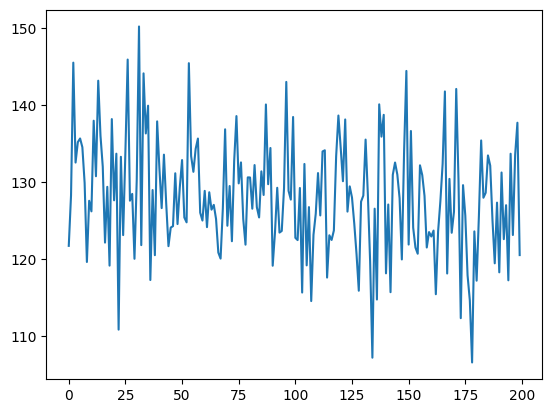

In [16]:
fig,axs=plt.subplots()
axs.plot(np.arange(len(step_loss["PDE_supervised_loss"][-200:])),step_loss["PDE_supervised_loss"][-200:])
#axs_=axs.twinx()
#axs_.plot(np.arange(len(step_loss["PDE_supervised_loss"][:])),step_loss["total_loss"][:])
#axs_=axs.twinx()
#axs_.plot(np.arange(len(step_loss["PDE_supervised_loss"][:])),step_loss["PDE_residual_loss"][:])
#fig.tight_layout()
plt.show()

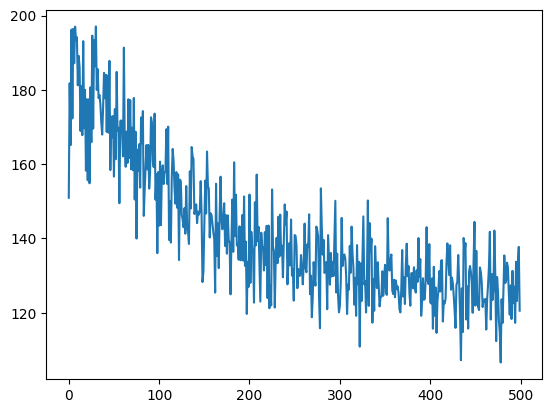

In [24]:

plt.plot(step_loss["PDE_supervised_loss"][-500:])